# Signal Detection
This assignment focuses on detecting simple signals in noise. Learning objectives include writing code to generate random signals, measuring different types of detection errors, and characterizing different types of error profiles with ROC curves. The following material provides both background and additional context: Dusenbery, D. B. (1992). Sensory Ecology. Chapter 5 Signal Detection, sections 5-1 and 5-2.

Name: Hart Williams

### 1. Generating signals with events and additive noise

### 1a. Randomly occurring events in Gaussian noise

Write a function `genwaveform(N=100, α=0.1, A=1, σ=1)` to generate a waveform that is a linear combination of a sparsely occurring events and additive Gaussian noise. Here, we assume the events are fixed amplitude impulses that occur within a single sample.  The observed waveform, therefore, is a linear combination of the Gaussian background noise and these discrete events.  The parameters specify the waveform length `N`, the event probability `α`, the event amplitude `A`, and noise standard deviation $\sigma$.  Assume the noise mean is zero.  The values listed are defaults.  The event probability specifies the probability of an event occurring within a sample.  Assume the events are independent.  The function should return a tuple of the resulting waveform and array of the event locations as indices.

Plot the generated waveform samples and display the location of the events with markers.

(Comment on terminology: The term "signal" can refer either to an individual event or the collection of events as a whole.  The waveform is the signal plus the noise.  Note that "signal" is sometimes used loosely to refer to the observed waveform, rather than the waveform without the noise.  This is because the signal itself cannot be observed directly, only inferred.  The term "underlying signal" is often used to emphasize the component of the waveform without the noise.)

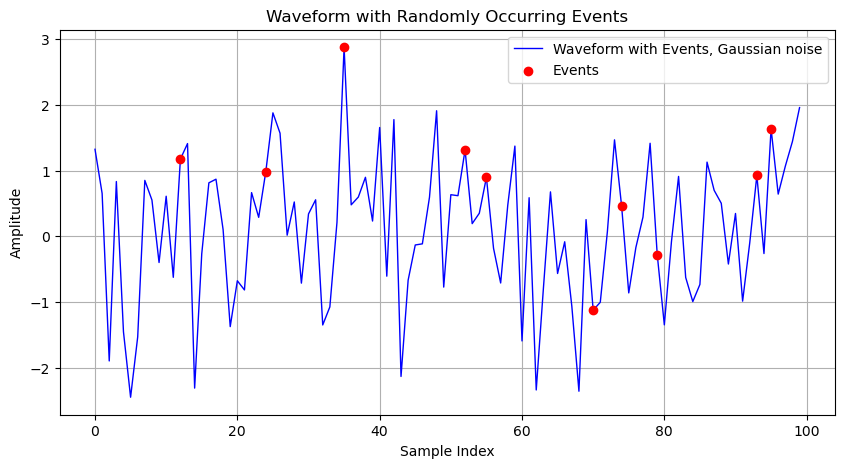

In [6]:
import numpy as np
import matplotlib.pyplot as plt

''' Parameters:
-- N is the waveform length and thus the number of samples
-- α is the probability of an event occuring at each sample
-- A is the amplitude of events
-- σ is the standard deviation of the Gaussian noise
The function should return a tuple of the resulting waveform and array of the event locations as indices. '''
def genwaveform(N=100, α=0.1, A=1, σ=1):
    # Generate noise, in this case random values from a normal distribution with mean 0 and standard deviation σ
    noise = np.random.normal(loc=0, scale=σ, size=N)

    # np.random.rand(N) generates random numbers between 0 and 1.
    # Generate random event occurrences based on probability α
    events = np.random.rand(N) < α     # boolean array indicating event presence

    # Generate "impulse train" where events occur
    impulses = np.zeros(N)   # Initialize an array of zeros
    impulses[events] = A     # Set impulse values at event locations

     # Combine noise and impulse train to form the final waveform
    waveform = noise + impulses

    # Get the indices of the True values meaning event occurrences
    event_indices = np.where(events)[0]   # 0 
    
    return waveform, event_indices

# Generate waveform
waveform, event_indices = genwaveform()

# Generate plot
plt.figure(figsize=(10, 5))
plt.plot(waveform, label='Waveform with Events, Gaussian noise', color='b', linewidth=1)  # Line plot of waveform
plt.scatter(event_indices, waveform[event_indices], color='r', marker='o', label='Events', zorder=3)  # Mark events
plt.xlabel('Sample Index')   # Label for x-axis
plt.ylabel('Amplitude')      # Label for y-axis
plt.title('Waveform with Randomly Occurring Events')  # Title
plt.legend()                 # Show legend
plt.grid(True)               # Add grid lines for readability
plt.show()

# The blue line represents the waveform, which consists of Gaussian noise and randomly occuring impulses
# The red markers indicate the locations of the events (impulses)

### 1b. Signals in uniform noise

Modify the `genwaveform` function so that it accepts an argument `noisetype` to specify the type of noise.  Here we will use `Gaussian` and `uniform`.  For uniform noise, we again assume zero mean.  The $\sigma$ parameter should be interpreted as the width of the uniform distribution with range $[-\sigma/2, \sigma/2)$.

Plot an example using uniform noise.

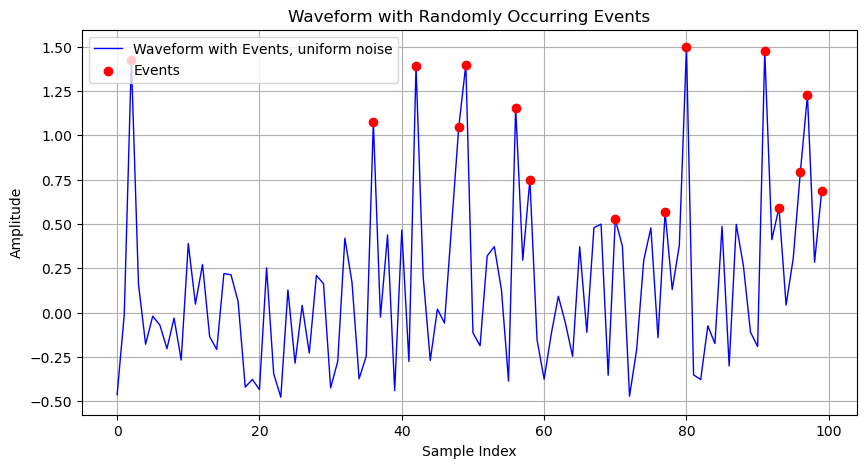

In [8]:
def genwaveform(N=100, α=0.1, A=1, σ=1, noisetype='Gaussian'):
    if noisetype == 'Gaussian':
        noise = np.random.normal(0, σ, N)
    elif noisetype == 'uniform':
        noise = np.random.uniform(-σ/2, σ/2, N)
    else:
        raise ValueError("Invalid noisetype. Choose 'Gaussian' or 'uniform'.")
        
    # Same code as before
    events = np.random.rand(N) < α  # Generate random event occurences based on probability a
    impulses = np.zeros(N)          # Initialize an array of zeros
    impulses[events] = A            # Set impulse values at event locations
    waveform = noise + impulses     # Combine noise and impulse train to form the final waveform
    event_indices = np.where(events)[0]  # Get the indices of event occurences
    
    return waveform, event_indices

# Generate waveform
waveform, event_indices = genwaveform(noisetype='uniform')

# Generate plot
plt.figure(figsize=(10, 5))
plt.plot(waveform, label='Waveform with Events, uniform noise', color='b', linewidth=1)  # Line plot of waveform
plt.scatter(event_indices, waveform[event_indices], color='r', marker='o', label='Events', zorder=3)  # Mark events
plt.xlabel('Sample Index')   # Label for x-axis
plt.ylabel('Amplitude')      # Label for y-axis
plt.title('Waveform with Randomly Occurring Events')  # Title
plt.legend()                 # Show legend
plt.grid(True)               # Add grid lines for readability
plt.show()

### 1c. Notation

For a discrete waveform, the observed sample at time t is $y[t]$. For additive noise, this is the sum of the signal $x[t]$ and the noise $\epsilon[t]$

$$
y[t] = x[t] + \epsilon[t]
$$
Note we have used square brackets to indicate that the functions are a discrete.

The discrete delta-function
$$
\delta[t] = \begin{cases}
1 & t = 0\\
0 & t \neq 0 \, ,
\end{cases}
$$
is commonly used is to express the occurrence of a unit impulse at sample $\tau$:
$$\delta[t-\tau]$$
i.e. a discrete function that is zero everywhere except at $t = \tau$, where it has a value of one.

Write an equation to express the signal $x[t]$ as a sum of $N$ events of amplitude $A$ that occur at times $\tau_i$.  Also write an expression to indicate that the noise $\epsilon[t]$ is distributed according to a Normal with mean $\mu$ and variance $\sigma^2$.

### Answer for 1c):
To express the signal $x[t]$ as a sum of $N$ events of amplitude $A$ that occur at times $\tau_i$, we use the discrete delta function:
$$
x[t] = \sum_{i=1}^{N} A_i \delta[t - \tau_i]
$$
where:
* $A_i$ is the amplitude at time $\tau_i$
* $\delta[t - \tau_i]$ ensures that the event only occurs at time $\tau_i$

For the noise $\epsilon[t]$, which follows a normal distribution with mean $\mu$ and variance $\sigma^2$, we write:
$$
\epsilon[t] \sim N(\mu, \sigma^2)
$$

### 1d. Conditional probability

What is the expression for the probability distribution of the waveform at time $t$ given that there is a signal?

### Answer for 1d):
Given that the observed waveform at time $t$ is 
$$
y[t] = x[t] + \epsilon[t],
$$
and the signal is expressed as
$$
x[t] = \sum_{i=1}^{N} A_i \delta[t - \tau_i],
$$
where the noise is normally distributed:
$$
\epsilon[t] \sim N(\mu, \sigma^2),
$$
the probability distribution of $y[t]$, given there is a signal at time $t$, is also normally distributed.

Since noise $\epsilon[t]$ is random but $x[t]$ is not, the effect of $x[t]$ is to shift the mean of the noise distribution.
Thus, if a signal is present at time $t$, the waveform follows:
$$
y[t] \mid x[t] \sim N(x[t] + \mu,\sigma^2).
$$
Given the presence of a signal, the waveform at time $t$ is normally distributed with a mean shifted by $x[t]$.

## 2. Signal detection

### 2a. Effect of parameters on detection probability

Explain what effect the parameters and type of noise have on detection probability.  For what values does the probability reduce to pure chance?  Or become certain (i.e. approach 1)?  Explain your reasoning and illustrate with plots.

### 2b. Types of detections and detection errors

Write a function `detectioncounts(si, y, θ)` which given an array `y`, signal index `si`, and threshold `θ`, returns a named tuple (tp, fn, fp, tn) of the counts of the true positives, false negatives, false positives, and true negatives.

Write a function that plots the samples and threshold and shows the true positives, false negatives, and false positives with different markers.

### 2c. Detection probabilities

Using either the error or signal probability distributions, what is the mathematical expression for the probability a false positive?  What is it for a false negative?  (Note that these are conditioned on the signal being absent or present, respectively.)

Write the functions `falsepos` and `falseneg` to return the expected false positive and negative rates.  The first argument should be the threshold $\theta$, the rest of the arguments should be keyword arguments that follow those of `genwaveform` but without unnecessary parameters.

What are the expected error probabilities using the information and count results from above?  How could you estimate these from the distribution parameters and detection threshold?  Show that your empirical results are consistent with those calculated analytically.

### Answer for 2a):
Detection probability refers to reliably we can identify events (impulses) within the noisy signal.
The key parameters that affect this are:
1. Event probability ($\alpha$):
* At a higher event probability, more events occur, and therefore events are easier to detect.
* At a lower event probability, fewer events occur, and therefore events are harder to detect.
2. Event amplitude ($A$):
* At a higher event amplitude, impulses stand out more from noise, and therefore detecting them is easier.
* At a lower event amplitude, impulses stand out less from noise, and therefore detecting them is more difficult.
3. Noise type and Level ($\sigma$):
* Gaussian noise ($N(0, \sigma^2)$):
  * With a greater variance, there is more variation in the noise, making it harder to distinguish noise from events.
  * With a smaller variance, events are more distinct, and thus detecting them is easier.
* Uniform noise ($U(-\sigma/2, \sigma/2)$):
  * Because uniform noise is bounded, event detection may be easier (than with Gaussian noise) in marginal cases

Detection probability is pure chance when the noise level ($\sigma$) is so high and the event amplitude ($A$) is so low that impulses cannot be distinguished from noise.

In contrast, detection probability becomes certain when the event amplitude $A$ is much larger than the spread of noise values and when the event probability ($\alpha$) is high, given enough events to recognize a pattern. In this case, impulses will be highly visible against the noise.

To illustrate, see plots below:

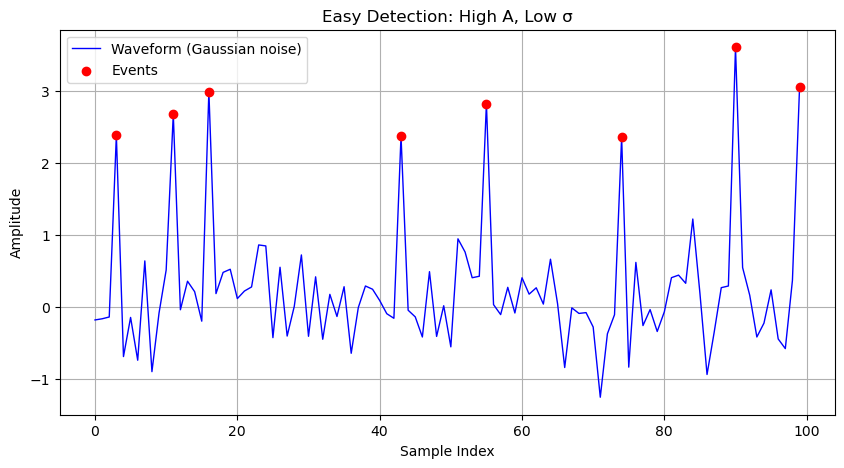

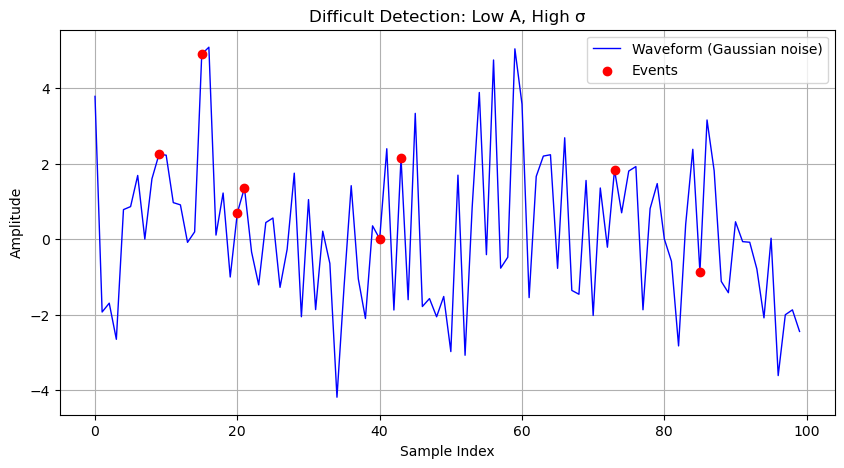

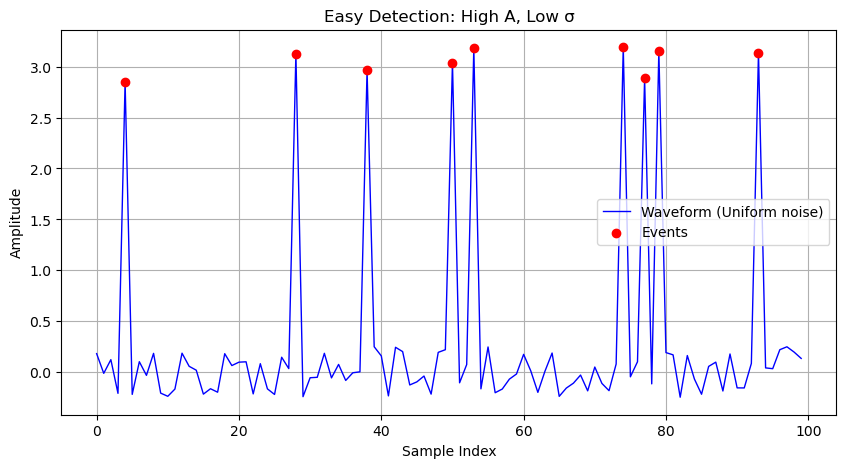

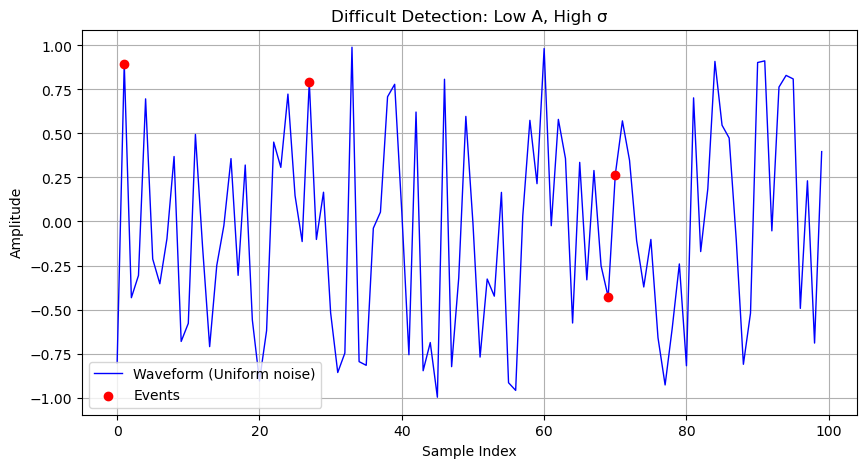

In [15]:
# 1) Gaussian, easy detection
waveform_1, e_idxs_1 = genwaveform(A=3, σ=0.5, noisetype='Gaussian')
plt.figure(figsize=(10, 5))
plt.plot(waveform_1, label='Waveform (Gaussian noise)', color='b', linewidth=1)  # Line plot of waveform
plt.scatter(e_idxs_1, waveform_1[e_idxs_1], color='r', marker='o', label='Events', zorder=3)  # Mark events
plt.xlabel('Sample Index')   # Label for x-axis
plt.ylabel('Amplitude')      # Label for y-axis
plt.title('Easy Detection: High A, Low σ')  # Title
plt.legend()                 # Show legend
plt.grid(True)               # Add grid lines for readability
plt.show()

# 2) Gaussian, difficult detection
waveform_2, e_idxs_2 = genwaveform(A=0.5, σ=2, noisetype='Gaussian')
plt.figure(figsize=(10, 5))
plt.plot(waveform_2, label='Waveform (Gaussian noise)', color='b', linewidth=1)  # Line plot of waveform
plt.scatter(e_idxs_2, waveform_2[e_idxs_2], color='r', marker='o', label='Events', zorder=3)  # Mark events
plt.xlabel('Sample Index')   # Label for x-axis
plt.ylabel('Amplitude')      # Label for y-axis
plt.title('Difficult Detection: Low A, High σ')  # Title
plt.legend()                 # Show legend
plt.grid(True)               # Add grid lines for readability
plt.show()

# 3) Uniform, easy detection
waveform_3, e_idxs_3 = genwaveform(A=3, σ=0.5, noisetype='uniform')
plt.figure(figsize=(10, 5))
plt.plot(waveform_3, label='Waveform (Uniform noise)', color='b', linewidth=1)  # Line plot of waveform
plt.scatter(e_idxs_3, waveform_3[e_idxs_3], color='r', marker='o', label='Events', zorder=3)  # Mark events
plt.xlabel('Sample Index')   # Label for x-axis
plt.ylabel('Amplitude')      # Label for y-axis
plt.title('Easy Detection: High A, Low σ')  # Title
plt.legend()                 # Show legend
plt.grid(True)               # Add grid lines for readability
plt.show()

# 4) Uniform, difficult detection
waveform_4, e_idxs_4 = genwaveform(A=0.5, σ=2, noisetype='uniform')
plt.figure(figsize=(10, 5))
plt.plot(waveform_4, label='Waveform (Uniform noise)', color='b', linewidth=1)  # Line plot of waveform
plt.scatter(e_idxs_4, waveform_4[e_idxs_4], color='r', marker='o', label='Events', zorder=3)  # Mark events
plt.xlabel('Sample Index')   # Label for x-axis
plt.ylabel('Amplitude')      # Label for y-axis
plt.title('Difficult Detection: Low A, High σ')  # Title
plt.legend()                 # Show legend
plt.grid(True)               # Add grid lines for readability
plt.show()

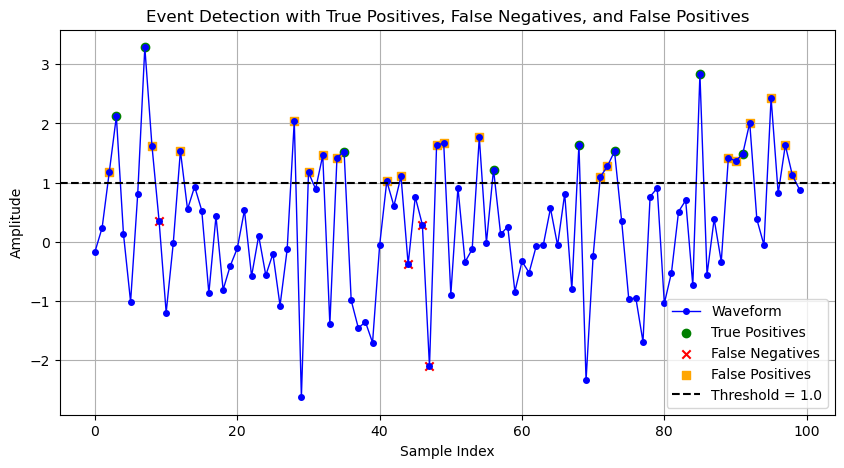

In [16]:
# Answer for 2b)

import numpy as np
from collections import namedtuple
'''
-- A sample in y is detected as positive if its value is => threshold

-- tp counts the number of events in si that exceed the threshold
-- fn counts the number of events in si that do not exceed the threshold

-- fp counts the number of non-event indicies incorrectly detected as events
-- tn counts the number of non-event indices that correctly remained undetected
'''
def detectioncounts(si, y, θ):
    # named tuple to store results
    DetectionResults = namedtuple('DetectionResults', ['tp', 'fn', 'fp', 'tn'])

    event_set = set(si)  # Convert signal indices to a set for fast lookup
    detected_indices = set(np.where(y >= θ)[0])  # Then get detected indices based on the threshold

    tp = len(event_set & detected_indices)  # Events correctly detected
    fn = len(event_set - detected_indices)  # Events not detected
    fp = len(detected_indices - event_set)  # Noise incorrectly detected as events
    total_samples = len(y)
    tn = total_samples - (tp + fn + fp)  # Remaining indices are noise correctly ignored

    return DetectionResults(tp, fn, fp, tn)


def plot_detections(si, y, θ):
    results = detectioncounts(si, y, θ)
    
    event_set = set(si)  # Convert signal indices to a set for fast lookup
    detected_indices = set(np.where(y >= θ)[0])  # Then get detected indices based on the threshold
    
    # Classify points
    tp_indices = list(event_set & detected_indices)  # True Positives
    fn_indices = list(event_set - detected_indices)  # False Negatives
    fp_indices = list(detected_indices - event_set)  # False Positives

    # Plot the waveform
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Waveform', color='b', linewidth=1, marker='o', markersize=4)

    # Plot detected events with different markers
    plt.scatter(tp_indices, y[tp_indices], color='g', marker='o', label='True Positives')  # Green Circles
    plt.scatter(fn_indices, y[fn_indices], color='r', marker='x', label='False Negatives')  # Red X
    plt.scatter(fp_indices, y[fp_indices], color='orange', marker='s', label='False Positives')  # Orange Squares

    # Plot threshold line
    plt.axhline(y=θ, color='k', linestyle='--', label=f'Threshold = {θ}')

    # Customize plot
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.title('Event Detection with True Positives, False Negatives, and False Positives')
    plt.legend()
    plt.grid(True)
    plt.show()


# Example
y_example, si_example = genwaveform(noisetype='Gaussian')
θ_example = 1.0  # Detection threshold
plot_detections(si_example, y_example, θ_example)

### Answer for 2c):
To compute the false positive and false negative rates, we use the probability distributions of the noise and signals.

$\textbf{False Positive Rate:}$
* A false positive occurs when a noise sample, where no event is present, exceeds the threshold $\theta$.
* This means we compute the probability:
$$
P_{FP} = P(y ≥ \theta \mid no\space event)
$$
* For Gaussian noise $y \sim N(0, \sigma^2)$:
$$ 
P_{FP} = 1-\phi\left(\frac{\theta}{\sigma}\right)
$$
  where Φ is the cumulative distribution function (CDF) of the standard normal distribution.
* For Uniform noise $y \sim U(-\sigma/2, \sigma/2)$:
$$
\begin{equation}
P_{FP} =
\begin{cases}
1 - \frac{\theta + \sigma/2}{\sigma}, & \text{if } \theta < \sigma/2 \\
0, & \text{if } \theta \geq \sigma/2
\end{cases}
\end{equation}
$$
  because uniform noise is bounded.
  
$\textbf{False Negative Rate:}$
* A false negative occurs when a true event (signal + noise) does not exceed the threshold $\theta$.
* The signal value is A + noise, so we compute:
$$  
P_{FN} = P(y < \theta \mid event\space present)
$$
* For Gaussian noise $y \sim N(A, \sigma^2)$:
$$
P_{FN} = \phi\left(\frac{\theta-A}{\sigma}\right)
$$
* For Uniform noise $y \sim U(-\sigma/2+A, \sigma/2+A)$:
$$
\begin{equation}
P_{FN} =
\begin{cases}
\frac{\theta - (A - \sigma/2)}{\sigma}, & \text{if } \theta > A - \sigma/2 \\
0, & \text{if } \theta \leq A - \sigma/2
\end{cases}
\end{equation}
$$

  

In [18]:
# Answer for (2c) continued: 
''' Here are the implementations of falsepos and falseneg: '''

from scipy.stats import norm


def falsepos(θ, σ=1, noisetype='Gaussian'):
    if noisetype == 'Gaussian':
        # False positive probability using Gaussian noise CDF
        return 1 - norm.cdf(θ / σ)
    
    elif noisetype == 'uniform':
        # False positive probability for uniform noise
        if θ < σ / 2:
            return 1 - (θ + σ/2) / σ
        else:
            return 0  # If threshold is outside noise range, no false positives
    
    else:
        raise ValueError("Invalid noisetype. Choose 'Gaussian' or 'uniform'.")


def falseneg(θ, A=1, σ=1, noisetype='Gaussian'):
    if noisetype == 'Gaussian':
        # False negative probability using Gaussian noise CDF, but centered at A
        return norm.cdf((θ - A) / σ)
    
    elif noisetype == 'uniform':
        # False negative probability for uniform noise
        if θ > A - σ/2:
            return (θ - (A - σ/2)) / σ
        else:
            return 0  # If threshold is below all possible signal+noise values
    
    else:
        raise ValueError("Invalid noisetype. Choose 'Gaussian' or 'uniform'.")


import pandas as pd

θ = 1.0    # Detection threshold
N = 10000  # Large sample size for accurate probability estimation
A = 1.0    # Signal amplitude
σ = 1.0    # Noise standard deviation

P_FP_analytical_Gaussian = falsepos(θ, σ=1, noisetype='Gaussian')   
P_FN_analytical_Gaussian = falseneg(θ, A=1, σ=1, noisetype='Gaussian')
P_FP_analytical_uniform = falsepos(θ, σ=1, noisetype='uniform')     
P_FN_analytical_uniform = falseneg(θ, A=1, σ=1, noisetype='uniform')

df_analytical_results = pd.DataFrame({
    "Noise Type": ["Gaussian", "Uniform"],
    "P_FP (Analytical)": [P_FP_analytical_Gaussian, P_FP_analytical_uniform],
    "P_FN (Analytical)": [P_FN_analytical_Gaussian, P_FN_analytical_uniform],
})
print(df_analytical_results)

# Generate waveform
y_Gaussian, si_Gaussian = genwaveform(N=N, α=0.1, A=A, σ=σ, noisetype='Gaussian')
y_Uniform, si_Uniform = genwaveform(N=N, α=0.1, A=A, σ=σ, noisetype='uniform')

# Get results
results_Gaussian = detectioncounts(si_Gaussian, y_Gaussian, θ)
results_Uniform = detectioncounts(si_Uniform, y_Uniform, θ)

''' Compute empirical probabilities
-- P_FP = False positives / Total non-events
-- P_FN = False negatives / Total real events '''
P_FP_empirical_Gaussian = results_Gaussian.fp / (results_Gaussian.fp + results_Gaussian.tn)
P_FN_empirical_Gaussian = results_Gaussian.fn / (results_Gaussian.fn + results_Gaussian.tp)
P_FP_empirical_Uniform = results_Uniform.fp / (results_Uniform.fp + results_Uniform.tn)
P_FN_empirical_Uniform = results_Uniform.fn / (results_Uniform.fn + results_Uniform.tp)

# Display results
df_empirical_results = pd.DataFrame({
    "Noise Type": ["Gaussian", "Uniform"],
    "P_FP (Empirical)": [P_FP_empirical_Gaussian, P_FP_empirical_Uniform],
    "P_FN (Empirical)": [P_FN_empirical_Gaussian, P_FN_empirical_Uniform],
})
print(df_empirical_results)

  Noise Type  P_FP (Analytical)  P_FN (Analytical)
0   Gaussian           0.158655                0.5
1    Uniform           0.000000                0.5
  Noise Type  P_FP (Empirical)  P_FN (Empirical)
0   Gaussian          0.153316          0.514822
1    Uniform          0.000000          0.486700


### Answer for (2c) continued:
$\textbf{Key Observations:}$

Gaussian Noise:
* The analytical and empirical false positive rates are very close.
* The analytical and empirical false negative rates are both ~50%, confirming the expected behavior.

Uniform Noise:
* The analytical and empirical false positive rates are both 0 given that uniform noise is bounded wihin a fixed range. If the threshold $\theta$ is outside this range, it is impossible for any noise value to exceed $\theta$, leading to no false positives.
* The analytical and empirical false negative rates are both ~50%, confirming the expected behavior.

Overall, this confirms that our analytical calculations are consistent with empirical results from the waveform simulation.

## 3. ROC cures

### 3a. Threshold considerations

Explain why, in general, there is not an optimal value for the threshold.  What value minimizes the total error probability?  How is that different from minimizing the total number of errors?

### 3b. ROC plot

Write a function `plotROC` to plot the ROC curve using the functions above.  It should use a similar parameter convention.

# 3a)
In general, there is no single "optimal" threshold because the choice of $\theta$ depends on the trade-off between false positives and false negatives. A low $\theta$ reduces false negatives but increases false positives, while a high $\theta$ reduces false positives but increases false negatives. Therefore, the best threshold varies by application.

The total error probability is:
$$ 
P_{error} = P_{FP}P(no\space event) + P_{FN}P(event)
$$
To minimize the total error probability, set $\theta$ at the point where:
$$ 
P_{FP}(1-\alpha) = P_{FN}\alpha
$$
This is known as the Bayes optimal decision threshold, and it balances false positives and false negatives based on event probabilities.

Minimizing total error probability considers the probability of events occuring, leading to a weighted balance of FP and FN.
In contrast, minimizing the total number of errors (both FP and FN) ignores their probabilities and focuses just on the number of mistakes.


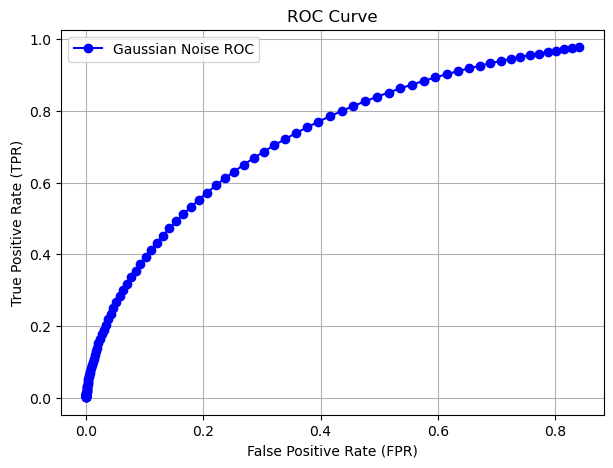

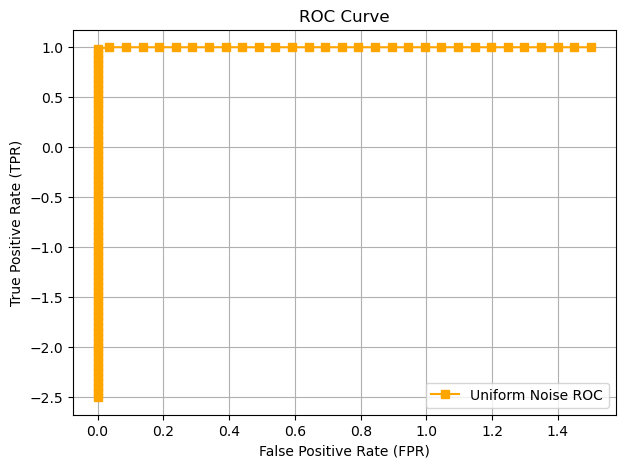

In [22]:
# 3b)
''' The ROC curve visualizes the trade-off between true positive rate (TPR) and false positive rate (FPR) for different detection thresholds.
By computing P_FP and P_FN over a range of threshold values for the theta, we plot TPR vs FPR. '''
def plotROC(N=100, α=0.1, A=1, σ=1, noisetype='Gaussian'):
    theta_values = np.linspace(-1, 4, 100)   # Define threshold range

    plt.figure(figsize=(7, 5))
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    
    # Compute TPR and FPR both Gaussian or Uniform
    if noisetype == "Gaussian":
        FPR_gaussian = [falsepos(theta, σ=σ, noisetype='Gaussian') for theta in theta_values]
        TPR_gaussian = [1 - falseneg(theta, A=A, σ=σ, noisetype='Gaussian') for theta in theta_values]
        plt.plot(FPR_gaussian, TPR_gaussian, marker='o', linestyle='-', label='Gaussian Noise ROC', color='b')
    elif noisetype == "uniform":
        FPR_uniform = [falsepos(theta, σ=σ, noisetype='uniform') for theta in theta_values]
        TPR_uniform = [1 - falseneg(theta, A=A, σ=σ, noisetype='uniform') for theta in theta_values]
        plt.plot(FPR_uniform, TPR_uniform, marker='s', linestyle='-', label='Uniform Noise ROC', color='orange')
    else:
        raise ValueError("Invalid noisetype. Choose 'Gaussian' or 'uniform'.")

    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

plotROC()  # Gaussian noise by default
plotROC(noisetype="uniform")